## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = merged_df["Mouse ID"].count()
mouse_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseid_timepoint_dupes = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'])]
mouseid_timepoint_dupes.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dupes = merged_df[merged_df.duplicated(['Mouse ID',])]
all_dupes.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop_duplicates('Mouse ID')
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_mice = cleaned_df["Mouse ID"].count()
unique_mice


249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median =  merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance =  merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation =  merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem =  merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, 
                           "Standard Deviation": standard_deviation, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

            # Unsure of what the ask is here. Can the df above be aggregated further? 

## Bar and Pie Charts

In [9]:
## Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
## Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

In [10]:
# Groupby Regimen
grouped_regimen_df = merged_df.groupby(['Drug Regimen'])
grouped_regimen_df.count()
regimen_summary = grouped_regimen_df.count()
regimen_summary


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [11]:
# Reset index
regimen_summary = regimen_summary.reset_index()
regimen_summary

,Drug Regimen,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,230,230,230,230,230,230,230
1,Ceftamin,178,178,178,178,178,178,178
2,Infubinol,178,178,178,178,178,178,178
3,Ketapril,188,188,188,188,188,188,188
4,Naftisol,186,186,186,186,186,186,186
5,Placebo,181,181,181,181,181,181,181
6,Propriva,161,161,161,161,161,161,161
7,Ramicane,228,228,228,228,228,228,228
8,Stelasyn,181,181,181,181,181,181,181
9,Zoniferol,182,182,182,182,182,182,182


Text(0, 0.5, 'Number of Trials')

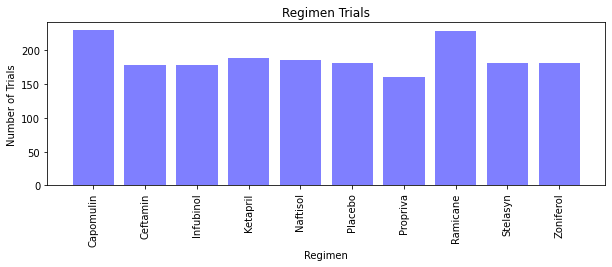

In [12]:
# Plot
x_axis = np.arange(len(regimen_summary))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,3))
plt.bar(x_axis, regimen_summary['Mouse ID'], color ='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, regimen_summary['Drug Regimen'], rotation='vertical')

# Add labels
plt.title('Regimen Trials')
plt.xlabel('Regimen')
plt.ylabel('Number of Trials')

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Generate a pie plot showing the distribution of female versus male mice using pyplot

grouped_sex_df = merged_df.groupby(['Sex'])
grouped_sex_df.count()
sex_summary = grouped_sex_df.count()
sex_summary

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,935,935,935,935,935,935,935
Male,958,958,958,958,958,958,958


In [14]:
sex_summary = sex_summary.reset_index()
sex_summary

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


(-1.25, 1.25, -1.25, 1.25)

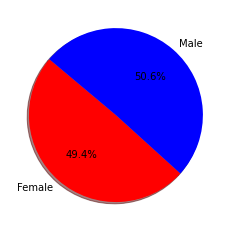

In [15]:
# Create lists
labels = ['Female', 'Male']
Trials = [935, 958]
colors = ['red', 'blue']

# Create pie chart
plt.pie(Trials,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  (Final Timepoint = 45 days)
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [17]:
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [18]:
# Sort by Drug Regime, Mouse ID and Timepoint
sorted_df = merged_df.sort_values(['Drug Regimen', 'Mouse ID', 'Timepoint'], ascending=True)
# Final Timepoint of 45 days only
final_timepoint_df = sorted_df.loc[sorted_df['Timepoint'] == 45]
final_timepoint_df.head().reset_index() 

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [19]:
# Capolmulin regimen only 
cap_df = final_timepoint_df[final_timepoint_df['Drug Regimen'].isin(['Capomulin'])]
cap_df.head().reset_index()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [20]:
# Use Tumor column to create object for column
cap_object = cap_df.sort_values(['Tumor Volume (mm3)'], ascending=True).reset_index()
cap_object = cap_object['Tumor Volume (mm3)']
cap_object

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [21]:
# Create quartile graph metrics
quartiles = cap_object.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f'Lower quartile is: {lowerq}')
print(f'Upper quartile is: {upperq}')
print(f'Interquartile range is {iqr}')
print(f'Median is: {quartiles[0.5]}')

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f'Values below {lower_bound} could be outliers.')
print(f'Values above {upper_bound} could be outliers.')


Lower quartile is: 32.37735684
Upper quartile is: 40.1592203
Interquartile range is 7.781863460000004
Median is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


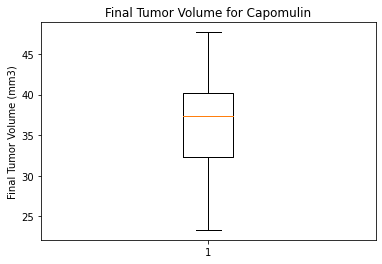

In [22]:
# Box plot for final tumor volume for four regimens 
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for Capomulin')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(cap_object)
plt.show()

## Line and Scatter Plots

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [24]:
# Single out a mouse
capomulin_mouse = capomulin_df.loc[capomulin_df['Mouse ID'] == 's185']
capomulin_mouse = capomulin_mouse.reset_index()
capomulin_mouse

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


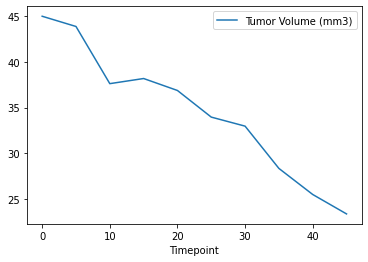

In [25]:
capomulin_mouse = capomulin_mouse.plot.line(x='Timepoint', y='Tumor Volume (mm3)')

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [27]:
capomulin_df = capomulin_df.loc[:, ['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]
capomulin_df.head() 

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876


In [28]:
avg_weight = pd.DataFrame(capomulin_df.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean()).reset_index()
avg_weight.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [29]:
avg_weight = avg_weight.rename(columns={'Tumor Volume (mm3)': 'Average Volume'})
avg_weight.head()

,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


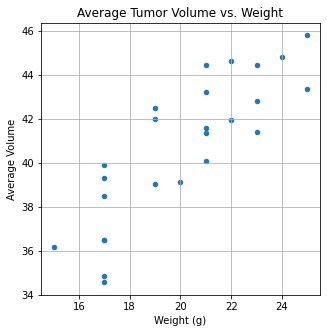

In [30]:
avg_weight.plot(kind="scatter", x="Weight (g)", y="Average Volume", 
               grid=True, figsize=(5,5), title="Average Tumor Volume vs. Weight")
plt.show()

## Correlation and Regression

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

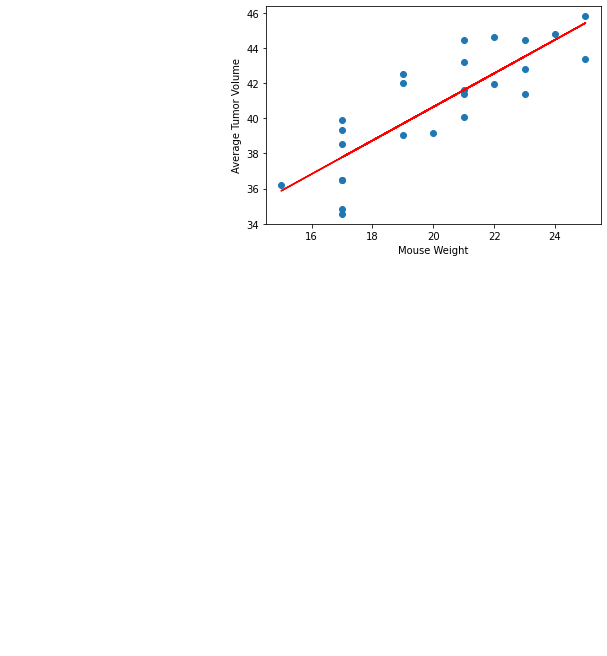

In [32]:
# Linear Regression 
x_values = avg_weight['Weight (g)']
y_values = avg_weight['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(6,10),fontsize=15,color='red')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()  

In [33]:
mouse_weight = avg_weight.iloc[:,0]
avg_tumor_volume = avg_weight.iloc[:,1]

#Use Pearson correlation coefficient
print(f'Correlation is {round(rvalue,2)}')

Correlation is 0.84
